In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import modules

from modules import ml_functions
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# from sklearn import metrics
# from sklearn.metrics import *
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.impute import SimpleImputer
# from sklearn.ensemble import ExtraTreesRegressor
# from catboost import Pool, CatBoostClassifier

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# 1.0 Data retrieval

In [2]:
df = pd.read_pickle('../../data_lake/output/2_dp.pkl')

In [3]:
df.sample(1)

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
SegFile,,,,,,,,,,,,,,,,,,,,,,,,
CTG1667.txt,106.0,106.0,0.0,0.0,7.0,64.0,0.6,0.0,10.4,0.0,0.0,0.0,20.0,102.0,122.0,1.0,0.0,111.0,111.0,112.0,0.0,0.0,1.0,1.0


# 2.0 Data preparation

In [4]:
for i in df:
    if df[i].dtype == 'object':
        df[i] = df[i].astype(str)

# 3.0 Modeling
## 3.1 Classe 1

In [5]:
class_nsp = 1.0

In [6]:
df = ml_functions.model_preparation(df,class_nsp)

In [7]:
model, X_test, y_test = ml_functions.model_training(df)

(942, 23)
GridSearchCV results...
Mean Train Scores: 
[0.99754902 0.99836601 0.99836601 0.99836601]

Mean Test CV Scores: 
[0.97875817 0.97875817 0.97712418 0.97875817]



Test results...
Model Test Accuracy: 0.9848484848484849
--------------------------------------------------
Model Test Confusion Matrix
Di seguito le prime 10 features per importanza:
['AC', 'MSTV', 'ALTV', 'ASTV', 'DP', 'Mode', 'Mean', 'Max', 'UC', 'Variance']


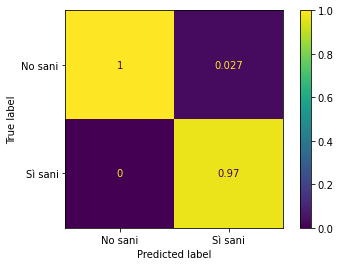

In [8]:
model = ml_functions.model_evaluation(model,X_test,y_test)

In [9]:
df = ml_functions.model_serving(df,model,class_nsp,X_test)

<AxesSubplot:>

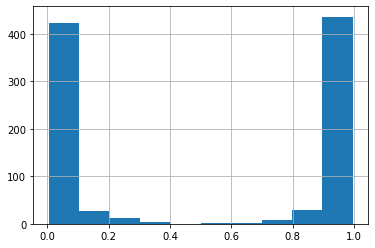

In [10]:
df['proba_classe_1.0'].hist()